In [23]:
"""
My first python programme on https://pythonprogramming.net/
Data Analysis part.
Date : 2017-12-04
"""
import quandl,math
import numpy as np
import pandas as pd

from sklearn import preprocessing,cross_validation,svm
from sklearn.linear_model import LinearRegression

df = quandl.get("WIKI/GOOGL")


In [25]:
# print(df.head(10))
# print(df.tail(10))
# print(df.info())
# 注意DataFrame的索引类型是DataTimeIndex ,  而这个索引在info中是显示不出来的
# print(df.index) 
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]

In [26]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low'])/df['Adj. Close']*100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open'])/df['Adj. Open'] * 100.0
df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

In [27]:
forecast_col='Adj. Close'
df.fillna(value=-99999,inplace=True)
forecast_out = int(math.ceil(0.01*len(df)))

In [38]:
# print(df[forecast_col]) # 这里df[forecast_col]是带着索引的
print(forecast_out) 
# print(df[forecast_col].head(50))
df['label'] = df[forecast_col].shift(-forecast_out) # 移一个月？还是抽样？
print(df['label'].tail(10))

34
Date
2017-10-03   NaN
2017-10-04   NaN
2017-10-05   NaN
2017-10-06   NaN
2017-10-09   NaN
2017-10-10   NaN
2017-10-11   NaN
2017-10-12   NaN
2017-10-13   NaN
2017-10-16   NaN
Name: label, dtype: float64


In [39]:
X=np.array(df.drop(['label'],1))
X=preprocessing.scale(X) # 对数据进行标准化 (X-mean)/std
X_lately=X[-forecast_out:]
X=X[:-forecast_out]
df.dropna(inplace=True)
y=np.array(df['label'])
X_train,X_test,y_train,y_test=cross_validation.train_test_split(X,y,test_size=0.2)

In [40]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train,y_train)
confidence=clf.score(X_test,y_test)
print(confidence)

0.975466388961


In [41]:
# 给出预测值
forecast_set=clf.predict(X_lately)
print(forecast_set,confidence,forecast_out) # 到此 我们已经预测出来未来34天的值

[  948.52834997   957.43154037   969.08904414   966.15982408   954.235486
   955.52427523   963.47903134   955.06285033   956.79359434   960.44389867
   964.8046835    953.87946797   948.76255007   943.17044881   950.59358318
   961.06617517   960.86438541   957.33927698   946.9861317    951.37461494
   971.7593221    978.82500019   987.72088607   980.2836045    986.24923744
   980.93051911   998.40270308  1007.02791377  1006.4966552   1000.71781016
  1018.4848982   1019.64322408  1022.28575731  1023.43383121] 0.975466388961 34


In [42]:
# 为了更加直观的理解，我们通过画图来看一下
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
df['Forecast']=np.nan # initiate value

In [45]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 24*3600
next_unix=last_unix+one_day
# 把预测值添加到源数据的 dataframe当中
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix+=86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

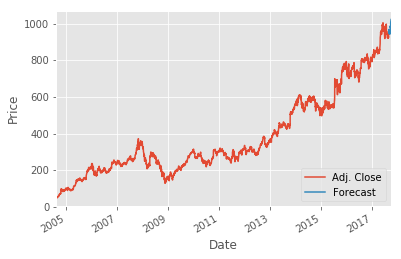

In [46]:
# 开始画图
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()